# Rossmann Store Sales

La tarea que se intentará resolver con este dataset es el de predicción de las ventas totales de cada tienda que tendrán lugar en un intervalo de 6 semanas

In [1]:
import pandas as pd
from pandas_summary import DataFrameSummary
import numpy as np
import datetime
from isoweek import Week


# Importamos el Dataset

La competencia permite agregar dataset externos para poder realizar la predicción, se usarán los dataset proporcionados en la competencia.{

In [2]:
df = pd. read_csv ('store.csv')
Test = pd.read_csv('test.csv')
Train = pd.read_csv('train.csv', low_memory=False)
store_states =  pd.read_csv('store_states.csv', low_memory=False)
state_names =  pd.read_csv('state_names.csv', low_memory=False)
GT =  pd.read_csv('GT.csv', low_memory=False)
weather =  pd.read_csv('weather.csv', low_memory=False)

Descripción de las variables de STORE.CSV

* Customers: La cantidad de clientes por día
* Open: Indicador si el store estaba abierto o cerrado: 0 = closed, 1 = open
* StateHoliday: Indica feriado en ese estado. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday: Inidica si el store fue afectado por el feriado escolar
* StoreType: Tipos de store: a, b, c, d
* Assortment: Describe el nivel de surtido de la tienda: a = basic, b = extra, c = extended
* CompetitionDistance: Distancia en metros al competidor
* CompetitionOpenSince[Month/Year]: Fecha en que abrío la competencia
* Promo: Si el store esta corriendo una promoción ese día
* Promo2: Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is  participating
* Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
* PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Visualización de los dataset

### Store.csv

In [3]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
Test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### Train CSV

In [5]:
Train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
DataFrameSummary(Train).summary()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1017209.0,1017209.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,NaN,1017209.0
mean,558.429727,3.998341,NaN,5773.818972,633.145946,0.830107,0.381515,NaN,0.178647
std,321.908651,1.997391,NaN,3849.926175,464.411734,0.375539,0.485759,NaN,0.383056
min,1.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
25%,280.0,2.0,NaN,3727.0,405.0,1.0,0.0,NaN,0.0
50%,558.0,4.0,NaN,5744.0,609.0,1.0,0.0,NaN,0.0
75%,838.0,6.0,NaN,7856.0,837.0,1.0,1.0,NaN,0.0
max,1115.0,7.0,NaN,41551.0,7388.0,1.0,1.0,NaN,1.0
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2


* Cada una de las variables tiene la misma cantidad de datos.
* No tienen missing datos. 
* tememos datos de tipo numerico, categorico y booleano. 


In [7]:
Train['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Se puede ver que la variable categorica de State Holiday tiene 4 categorias de 1, a b, y c. 

### Store.csv

In [8]:
DataFrameSummary(df).summary()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.0,NaN,NaN,1112.0,761.0,761.0,1115.0,571.0,571.0,NaN
mean,558.0,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.17472,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.0,NaN,NaN,20.0,1.0,1900.0,0.0,1.0,2009.0,NaN
25%,279.5,NaN,NaN,717.5,4.0,2006.0,0.0,13.0,2011.0,NaN
50%,558.0,NaN,NaN,2325.0,8.0,2010.0,1.0,22.0,2012.0,NaN
75%,836.5,NaN,NaN,6882.5,10.0,2013.0,1.0,37.0,2013.0,NaN
max,1115.0,NaN,NaN,75860.0,12.0,2015.0,1.0,50.0,2015.0,NaN
counts,1115,1115,1115,1112,761,761,1115,571,571,571
uniques,1115,4,3,654,12,23,2,24,7,3


* Tenemos perdida de datos en "COmpetition Distance", "Competition Open Since Month", "Competition Open Sine YEAR", "Promo 2 since Week", "Promo2SinceYear" y en "Promo Interval"
* Tenemos 3 variables categoricas.

In [9]:
df["StoreType"].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [10]:
df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [11]:
df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

### Store_states.csv

In [12]:
store_states.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [13]:
DataFrameSummary(store_states).summary()

,Store,State
count,1115.0,NaN
mean,558.0,NaN
std,322.01708,NaN
min,1.0,NaN
25%,279.5,NaN
50%,558.0,NaN
75%,836.5,NaN
max,1115.0,NaN
counts,1115,1115
uniques,1115,12


* No tenemos perdida de datos
* hay una variable categorica. 

In [14]:
store_states['State'].value_counts()

NW       286
BY       180
SH       115
HE       112
BE        92
SN        75
BW        73
ST        56
RP        40
TH        36
HH        28
HB,NI     22
Name: State, dtype: int64

In [15]:
state_names.head()

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


In [16]:
DataFrameSummary(state_names).summary()

,StateName,State
count,16,16
unique,16,16
top,BadenWuerttemberg,BW
freq,1,1
counts,16,16
uniques,16,16
missing,0,0
missing_perc,0%,0%
types,unique,unique


* No hay datos faltantes
* variables de tipo unicas. 

In [17]:
GT.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [18]:
DataFrameSummary(GT).summary()

,file,week,trend
count,NaN,NaN,2072.0
mean,NaN,NaN,63.814189
std,NaN,NaN,12.650246
min,NaN,NaN,0.0
25%,NaN,NaN,55.0
50%,NaN,NaN,64.0
75%,NaN,NaN,72.0
max,NaN,NaN,100.0
counts,2072,2072,2072
uniques,14,148,68


* no hay datos faltantes 
* dos variables categoricas

In [19]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


In [20]:
DataFrameSummary(weather).summary()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,NaN,NaN,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,15840.0,...,15459.0,15459.0,15459.0,15840.0,15840.0,3604.0,15840.0,14667.0,NaN,15840.0
mean,NaN,NaN,14.644129,10.388952,6.19899,8.587816,6.205808,3.626136,93.659596,74.282891,...,24.057572,12.239796,7.025163,22.766604,11.972222,48.864317,0.831718,5.551306,NaN,175.896717
std,NaN,NaN,8.646012,7.37926,6.526391,6.24478,6.086768,6.12839,7.67853,13.486552,...,8.976799,5.067944,4.980602,8.988618,5.872844,13.026954,2.513506,1.68771,NaN,101.588872
min,NaN,NaN,-11.0,-13.0,-15.0,-14.0,-15.0,-73.0,44.0,30.0,...,0.0,0.0,0.0,3.0,2.0,21.0,0.0,0.0,NaN,-1.0
25%,NaN,NaN,8.0,4.0,1.0,4.0,2.0,-1.0,90.75,65.0,...,14.0,10.0,3.0,16.0,8.0,39.0,0.0,5.0,NaN,80.0
50%,NaN,NaN,15.0,11.0,7.0,9.0,7.0,4.0,94.0,76.0,...,31.0,11.0,7.0,21.0,11.0,48.0,0.0,6.0,NaN,202.0
75%,NaN,NaN,21.0,16.0,11.0,13.0,11.0,8.0,100.0,85.0,...,31.0,14.0,10.0,27.0,14.0,55.0,0.25,7.0,NaN,256.0
max,NaN,NaN,39.0,31.0,24.0,25.0,20.0,19.0,100.0,100.0,...,31.0,31.0,31.0,101.0,53.0,111.0,58.93,8.0,NaN,360.0
counts,15840,15840,15840,15840,15840,15840,15840,15840,15840,15840,...,15459,15459,15459,15840,15840,3604,15840,14667,11889,15840
uniques,16,990,51,45,40,40,36,40,53,71,...,24,32,24,44,29,47,41,9,21,362


# Preparando Datasets para el estudio

### Perdida de datos del dataset. 

-Se tiene datos perdidos en la base de datos de store, weather y Test. 

In [21]:
#Dataset Store. 
print(list(df.columns[df.describe(include = 'all').loc['count']<len(df)]))
#Dataset Test
print(list(Test.columns[Test.describe(include = 'all').loc['count']<len(Test)]))
#Dataset Weather.
print(list(weather.columns[weather.describe(include = 'all').loc['count']<len(weather)]))

['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
['Open']
['Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'CloudCover', 'Events']


In [22]:
Test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Dataset Test.

In [23]:
# La variable que falta por completar en el dataset es "OPEN" la cual consideramos que no abre los dias 7 de cada
# "DAY OF WEEK" debido a que en el dataset aparece cómo open = "0" cuando Day of the week ="7". 
#Si no es dia 7 esta abierto
Test.loc[Test['Open'].isna(), 'Open'] = (Test[Test['Open'].isna()]['DayOfWeek'] != 7)*1.0

In [24]:
#Dataset Test
print(list(Test.columns[Test.describe(include = 'all').loc['count']<len(Test)]))

[]


* No hay datos faltantes en test. 

DATASET STORE

Variables con datos faltantes 

['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [25]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Las variables de Competition distance. es la Distancia en metros al competidor
En este caso es una variable continua con pocos valores faltantes, por lo que se sustituye por un valor intermedio.

La variable de competition OPEN Since Month. : Fecha en que abrío la competencia por mes
Se ve que no hay mucha diferencia con un caso que no es NaN, y como no es una variable continua, usaremos la moda.
como si las tiendas decidieran abrir con el resto de las tiendas

La variable Open Since Year. : Fecha en que abrío la competencia por año
Aplicaremos lo mismo que se usó en las variables Open since month. 

La variable Promo 2Since Week describe el año y la semana en la que la tienda empezo a participar en la promocion (semana)

la variable  Promo 2 Since Year.: describe el año y la semana en la que la tienda empezo a participar en la promocion (año)

La variable Promo intevla. Describe los intervalos consecutivos de la promocion

Las caracteristicas de las variables PROMO 2 SINCE WEEK, YEAR y Promo interval muestran que el Valor PROMO2 es 0 indicando que no
la semana donde empezó es cero por lo tanto todos los valores faltatnes serán reemplazados con 0



In [26]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [27]:
# Fechas de las mas antiguas segun datos y tambien las fechas anteriores las pongo como minimo en 1990
df.loc[df['CompetitionOpenSinceYear'].isna() | (df['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceYear'] = np.int32(1990)
df.loc[df['CompetitionOpenSinceMonth'].isna() | (df['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceMonth'] = np.int32(1)
df.loc[df['CompetitionDistance'].isna(), 'CompetitionDistance'] = df['CompetitionDistance'].max()
df.loc[df['Promo2SinceWeek'].isna() & (df['Promo2'] == 0), 'Promo2SinceWeek'] = np.int32(1)
df.loc[df['Promo2SinceYear'].isna() & (df['Promo2'] == 0), 'Promo2SinceYear'] = np.int32(1990)
df.loc[df['PromoInterval'].isna() & (df['Promo2'] == 0), 'PromoInterval'] = '-'

In [28]:
#Dataset Store. 
print(list(df.columns[df.describe(include = 'all').loc['count']<len(df)]))

[]


* No hay datos faltantes en store. 

DATASET WEATHER.

Se tienen los siguientes variables con datos faltantes. 

Max_VisibilityKm Mean_VisibilityKm Min_VisibilitykM son variables que indican la visbilidad. no tiene muchos datos perdidos por lo que se puede considerar como un día tranquilo y ponerle la moda o una visibilidad promedio

Max_Gust_SpeedKm_h: es una variable con una falta de 78% de datos por lo cual no se usará en el estudio. 

CloudCover: indica si el dia estava nublado. se puede usar una media

Events: Es una variable categorica que indica si ubo algun evento climatico, por lo que se puede remplazar por un cero

In [29]:
weather.Max_VisibilityKm.fillna(weather.Max_VisibilityKm.median(),inplace=True)
weather.Mean_VisibilityKm.fillna(weather.Mean_VisibilityKm.median(),inplace=True)
weather.Min_VisibilitykM.fillna(weather.Min_VisibilitykM.median(),inplace=True)

In [30]:
weather.Max_Gust_SpeedKm_h.fillna(0, inplace=True)

In [31]:
weather.CloudCover.fillna(weather.CloudCover.median(),inplace=True)

In [32]:
weather.Events.fillna("NA", inplace=True)

In [33]:
print(list(weather.columns[weather.describe(include = 'all').loc['count']<len(weather)]))

[]


* No hay datos faltantes en weather. 

Se pasa a fecha algunas columnas para ponerlas en dias de diferencia con respecto a la fecha

In [34]:
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(np.int32)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(np.int32)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(np.int32)
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(np.int32)

In [35]:
# Creo una nueva columna con fecha de apertura en formato de fecha (dia 15 por que no tengo el dato y no es relevante)
df['CompetitionOpenSince'] = pd.to_datetime(df.apply(lambda x: datetime.datetime(
    x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth, 15), axis=1))

In [36]:
df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))

## Combinando Dataset Weather y state_names

In [37]:
#Funcion para combinar los dataset
def join(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

#Instruccion para combinar los dataset
weather = join(weather, state_names, "file", "StateName")

In [38]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,State
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,4.0,39,26,58.0,5.08,6.0,Rain,215,NordrheinWestfalen,NW
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,10.0,24,16,0.0,0.00,6.0,Rain,225,NordrheinWestfalen,NW
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,2.0,26,21,0.0,1.02,7.0,Rain,240,NordrheinWestfalen,NW
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,2.0,23,14,0.0,0.25,7.0,Rain,263,NordrheinWestfalen,NW
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,3.0,16,10,0.0,0.00,7.0,Rain,268,NordrheinWestfalen,NW


## Cambiando el formato de las variables con fechas. 

In [39]:
#funcion para transformar el formato de las variables
def add_datepart(df):
    df.Date = pd.to_datetime(df.Date)
    df["Year"] = df.Date.dt.year
    df["Month"] = df.Date.dt.month
    df["Week"] = df.Date.dt.week
    df["Day"] = df.Date.dt.day
    

In [40]:
add_datepart(weather)

C:\Users\destr\AppData\Local\Temp\ipykernel_25604\3339103547.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Date.dt.week


In [41]:
add_datepart(Train)

C:\Users\destr\AppData\Local\Temp\ipykernel_25604\3339103547.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Date.dt.week


In [42]:
add_datepart(Test)

C:\Users\destr\AppData\Local\Temp\ipykernel_25604\3339103547.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df.Date.dt.week


### Se unen los demás datasets

In [43]:
df_STORE = join(df, store_states, "Store")


In [44]:
len(df_STORE[df_STORE.State.isnull()])

0

In [45]:
df_STORE.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State'],
      dtype='object')

In [46]:
joined_train = join(Train, df_STORE, "Store")
len(joined_train[joined_train.StoreType.isnull()])

0

In [47]:
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State'],
      dtype='object')

In [48]:
joined_test = join(Test, df_STORE, "Store")
len(joined_test[joined_test.StoreType.isnull()])

0

In [49]:
joined_train = join(joined_train, weather, ["State","Date"])
len(joined_train[joined_train.Mean_TemperatureC.isnull()])

0

In [50]:
joined_test = join(joined_test, weather, ["State","Date"])
len(joined_test[joined_test.Mean_TemperatureC.isnull()])

0

In [51]:
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees',
       'StateName', 'Year_y', 'Month_y', 'Week_y', 'Day_y'],
      dtype='object')

In [52]:
joined_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,Year_y,Month_y,Week_y,Day_y
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,0.0,0.0,1.0,Fog,13,Hessen,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,0.0,0.0,4.0,Fog,309,Thueringen,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,0.0,0.0,2.0,Fog,354,NordrheinWestfalen,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,0.0,0.0,6.0,NA,282,Berlin,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,0.0,0.0,4.0,NA,290,Sachsen,2015,7,31,31


In [53]:
joined_train["CompetitionDaysOpen"] = joined_train.Date.subtract(joined_train["CompetitionOpenSince"]).dt.days

In [54]:
joined_test["CompetitionDaysOpen"] = joined_test.Date.subtract(joined_test["CompetitionOpenSince"]).dt.days


In [55]:
# Corrige errores de la formula anterior
joined_train.loc[joined_train.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined_train.loc[joined_train.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0
# en meses y limita a 2 años como máximo
joined_train["CompetitionMonthsOpen"] = joined_train["CompetitionDaysOpen"]//30
joined_train.loc[joined_train.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24

In [56]:
# Corrige errores de la formula anterior
joined_test.loc[joined_test.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
joined_test.loc[joined_test.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0
# en meses y limita a 2 años como máximo
joined_test["CompetitionMonthsOpen"] = joined_test["CompetitionDaysOpen"]//30
joined_test.loc[joined_test.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24

In [57]:
joined_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees',
       'StateName', 'Year_y', 'Month_y', 'Week_y', 'Day_y',
       'CompetitionDaysOpen', 'CompetitionMonthsOpe

In [58]:
# PROMODATES
joined_train["Promo2Days"] = joined_train.Date.subtract(joined_train["Promo2Since"]).dt.days
joined_train.loc[joined_train.Promo2Days<0, "Promo2Days"] = 0
joined_train.loc[joined_train.Promo2SinceYear<1990, "Promo2Days"] = 0
joined_train["Promo2Weeks"] = joined_train["Promo2Days"]//7
joined_train.loc[joined_train.Promo2Weeks<0, "Promo2Weeks"] = 0
joined_train.loc[joined_train.Promo2Weeks>25, "Promo2Weeks"] = 25

In [59]:
joined_test["Promo2Days"] = joined_test.Date.subtract(joined_test["Promo2Since"]).dt.days
joined_test.loc[joined_test.Promo2Days<0, "Promo2Days"] = 0
joined_test.loc[joined_test.Promo2SinceYear<1990, "Promo2Days"] = 0
joined_test["Promo2Weeks"] = joined_test["Promo2Days"]//7
joined_test.loc[joined_test.Promo2Weeks<0, "Promo2Weeks"] = 0
joined_test.loc[joined_test.Promo2Weeks>25, "Promo2Weeks"] = 25

In [60]:
joined_train.shape, joined_test.shape

((1017209, 57), (41088, 56))

In [61]:
# Remove dup columns
joined_train = joined_train.loc[:,~joined_train.columns.duplicated()]
joined_test = joined_test.loc[:,~joined_test.columns.duplicated()]

In [62]:
joined_train.shape, joined_test.shape

((1017209, 57), (41088, 56))

In [63]:
set(joined_train.columns) - set(joined_test.columns)

{'Customers', 'Sales'}

### Conversión de variables

In [64]:
import pandas as pd
import numpy as np
from pandas_summary import DataFrameSummary
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

C:\Users\destr\anaconda3\envs\TP_2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [65]:
from sklearn_pandas import DataFrameMapper

In [66]:
DataFrameSummary(joined_train).summary()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WindDirDegrees,StateName,Year_y,Month_y,Week_y,Day_y,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks
count,1017209.0,1017209.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,NaN,1017209.0,1017209.0,...,1017209.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0
mean,558.429727,3.998341,NaN,5773.818972,633.145946,0.830107,0.381515,NaN,0.178647,2013.832292,...,177.063058,NaN,2013.832292,5.846762,23.615515,15.70279,4059.580869,20.207503,4829.959271,22.860599
std,321.908651,1.997391,NaN,3849.926175,464.411734,0.375539,0.485759,NaN,0.383056,0.777396,...,101.748176,NaN,0.777396,3.326097,14.433381,8.787638,3540.99604,7.959786,4061.914464,6.723693
min,1.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,2013.0,...,-1.0,NaN,2013.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,280.0,2.0,NaN,3727.0,405.0,1.0,0.0,NaN,0.0,2013.0,...,79.0,NaN,2013.0,3.0,11.0,8.0,889.0,24.0,762.0,25.0
50%,558.0,4.0,NaN,5744.0,609.0,1.0,0.0,NaN,0.0,2014.0,...,201.0,NaN,2014.0,6.0,22.0,16.0,2771.0,24.0,2147.0,25.0
75%,838.0,6.0,NaN,7856.0,837.0,1.0,1.0,NaN,0.0,2014.0,...,257.0,NaN,2014.0,8.0,35.0,23.0,8592.0,24.0,8867.0,25.0
max,1115.0,7.0,NaN,41551.0,7388.0,1.0,1.0,NaN,1.0,2015.0,...,360.0,NaN,2015.0,12.0,52.0,31.0,9328.0,24.0,9342.0,25.0
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,...,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2,3,...,362,12,3,12,52,31,8748,25,3138,26


In [67]:
DataFrameSummary(joined_test).summary()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WindDirDegrees,StateName,Year_y,Month_y,Week_y,Day_y,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks
count,41088.0,41088.0,41088.0,NaN,41088.0,41088.0,NaN,41088.0,41088.0,41088.0,...,41088.0,NaN,41088.0,41088.0,41088.0,41088.0,41088.0,41088.0,41088.0,41088.0
mean,20544.5,555.899533,3.979167,NaN,0.854361,0.395833,NaN,0.443487,2015.0,8.354167,...,177.219577,NaN,2015.0,8.354167,34.645833,13.520833,4899.190859,22.754527,4643.904206,24.923092
std,11861.228267,320.274496,2.015481,NaN,0.352748,0.489035,NaN,0.496802,0.0,0.478266,...,99.239652,NaN,0.0,0.478266,2.015481,8.44845,3675.794303,4.29146,4040.145163,0.909503
min,1.0,1.0,1.0,NaN,0.0,0.0,NaN,0.0,2015.0,8.0,...,6.0,NaN,2015.0,8.0,31.0,1.0,0.0,0.0,61.0,8.0
25%,10272.75,279.75,2.0,NaN,1.0,0.0,NaN,0.0,2015.0,8.0,...,83.0,NaN,2015.0,8.0,33.0,6.75,1443.0,24.0,1046.0,25.0
50%,20544.5,553.5,4.0,NaN,1.0,0.0,NaN,0.0,2015.0,8.0,...,186.0,NaN,2015.0,8.0,35.0,12.5,3634.0,24.0,1997.0,25.0
75%,30816.25,832.25,6.0,NaN,1.0,1.0,NaN,1.0,2015.0,9.0,...,264.0,NaN,2015.0,9.0,36.0,19.25,9344.0,24.0,9362.0,25.0
max,41088.0,1115.0,7.0,NaN,1.0,1.0,NaN,1.0,2015.0,9.0,...,358.0,NaN,2015.0,9.0,38.0,31.0,9376.0,24.0,9390.0,25.0
counts,41088,41088,41088,41088,41088,41088,41088,41088,41088,41088,...,41088,41088,41088,41088,41088,41088,41088,41088,41088,41088
uniques,41088,856,7,48,2,2,2,2,1,2,...,224,8,1,2,8,31,5499,25,1861,18


In [68]:
joined_train['StateHoliday_bool'] = joined_train.StateHoliday!='0'
joined_test['StateHoliday_bool'] = joined_test.StateHoliday!='0'

In [69]:
joined_train.shape, joined_test.shape

((1017209, 58), (41088, 57))

In [70]:
set(joined_train.columns) - set(joined_test.columns)

{'Customers', 'Sales'}

In [71]:
df_train =joined_train
df_test = joined_test

In [72]:
DataFrameSummary(df_train).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
Store,1115,numeric,0
DayOfWeek,7,numeric,0
Date,942,date,0
Sales,21734,numeric,0
Customers,4086,numeric,0
Open,2,bool,0
Promo,2,bool,0
StateHoliday,4,categorical,0
SchoolHoliday,2,bool,0
Year,3,numeric,0


In [73]:
df_train["PromoInterval"].head

<bound method NDFrame.head of 0                         -
1           Jan,Apr,Jul,Oct
2           Jan,Apr,Jul,Oct
3                         -
4                         -
                 ...       
1017204     Jan,Apr,Jul,Oct
1017205                   -
1017206                   -
1017207                   -
1017208    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1017209, dtype: object>

In [82]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 
            'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 
            'CompetitionOpenSinceYear', 'Promo2SinceYear', 
            'State', 'Week', 'Events']

In [83]:
contin_vars = ['CompetitionDistance', 
               'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 
               'Precipitationmm', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 
               'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover',
               'Promo', 'SchoolHoliday', 'StateHoliday_bool']

In [84]:
cat_maps = [(o, LabelEncoder()) for o in cat_vars]
contin_maps = [([o], StandardScaler()) for o in contin_vars]

In [85]:
mapper_cat = DataFrameMapper(cat_maps)
_ = mapper_cat.fit(df_train)

In [86]:
mapper_cont = DataFrameMapper(contin_maps)
_ = mapper_cont.fit(df_train)

In [87]:
df_train[cat_vars] = mapper_cat.transform(df_train)
df_test[cat_vars] = mapper_cat.transform(df_test)

In [88]:
df_train[contin_vars] = mapper_cont.transform(df_train)
df_test[contin_vars] = mapper_cont.transform(df_test)

In [89]:
DataFrameSummary(df_train[cat_vars]).summary().loc[['uniques', 'types']]

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


In [90]:
df_sales = df_train[df_train.Sales!=0]

In [91]:
df_sales.shape

(844338, 58)

In [92]:
df_test.reset_index(inplace=True)

In [93]:
df_sales.reset_index(inplace=True)


In [94]:
(df_test['Open'] == 0).sum()

5984

In [95]:
(df_sales['Open'] == 0).sum()

0

In [96]:
(df_train['CompetitionDistance'].isna()).sum()

0

In [97]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StateName,Year_y,Month_y,Week_y,Day_y,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool
0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,2,...,Hessen,2015,7,31,31,2510,24,9342,25,-0.177442
1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,2,...,Thueringen,2015,7,31,31,2815,24,1950,25,-0.177442
2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,2,...,NordrheinWestfalen,2015,7,31,31,3150,24,1579,25,-0.177442
3,3,4,2015-07-31,13995,1498,1,1.273237,0,2.144211,2,...,Berlin,2015,7,31,31,2145,24,9342,25,-0.177442
4,4,4,2015-07-31,4822,559,1,1.273237,0,2.144211,2,...,Sachsen,2015,7,31,31,107,3,9342,25,-0.177442


## BASELINE

In [98]:
import datetime

In [99]:
df_sales.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,StateName,Year_y,Month_y,Week_y,Day_y,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool
0,0,0,4,2015-07-31,5263,555,1,1.273237,0,2.144211,...,Hessen,2015,7,31,31,2510,24,9342,25,-0.177442
1,1,1,4,2015-07-31,6064,625,1,1.273237,0,2.144211,...,Thueringen,2015,7,31,31,2815,24,1950,25,-0.177442
2,2,2,4,2015-07-31,8314,821,1,1.273237,0,2.144211,...,NordrheinWestfalen,2015,7,31,31,3150,24,1579,25,-0.177442
3,3,3,4,2015-07-31,13995,1498,1,1.273237,0,2.144211,...,Berlin,2015,7,31,31,2145,24,9342,25,-0.177442
4,4,4,4,2015-07-31,4822,559,1,1.273237,0,2.144211,...,Sachsen,2015,7,31,31,107,3,9342,25,-0.177442


In [100]:
df_train = df_sales[df_sales.Date < datetime.datetime(2015, 7, 1)]  
df_val = df_sales[df_sales.Date >= datetime.datetime(2015, 7, 1)]
len(df_train)/len(df_sales), len(df_val)/len(df_sales), len(df_sales), len(df_val)

(0.9642465458145908, 0.035753454185409164, 844338, 30188)

In [101]:
#rmse
final_train = False
def get_metric(sales, sales_):
    return np.sqrt((((sales - sales_)/sales)**2).sum()/len(sales))

In [102]:
max_sales = df_train['Sales'].max()
df_sales.loc[:, 'Sales_norm'] = df_sales['Sales'].values/max_sales

C:\Users\destr\AppData\Local\Temp\ipykernel_25604\2399010020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.loc[:, 'Sales_norm'] = df_sales['Sales'].values/max_sales


In [103]:
df_train.loc[:, 'Sales_norm'] = df_train['Sales'].values/max_sales
df_val.loc[:, 'Sales_norm'] = df_val['Sales'].values/max_sales

C:\Users\destr\AppData\Local\Temp\ipykernel_25604\2193462401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'Sales_norm'] = df_train['Sales'].values/max_sales
C:\Users\destr\AppData\Local\Temp\ipykernel_25604\2193462401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.loc[:, 'Sales_norm'] = df_val['Sales'].values/max_sales


### baseline embendings

In [104]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [105]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [106]:
def get_keras_LR(X_columns, hidden_units=1):
    inputs = []
    activation = 'linear'
    if hidden_units>1:
        activation = 'relu'
    for i, col in enumerate(X_columns):
        inp = Input(shape=(X_train[i].shape[1],), name=f"{col}_input")
        inputs.append(inp)
    if len(X_columns)>1:
        concat_out = Concatenate()(inputs)
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(inputs[0])
    if hidden_units>1:
        dense_out = Dense(1, name='Dense_out')(dense_out)
    model = Model(inputs, dense_out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model


def get_embedings_NN(X_columns, hidden_units = 20, activation = 'relu'):
    embed_outs = []
    inputs = []
    for i, col in enumerate(X_columns):
        inp = Input(shape=(1,), name=f"{col}_input")
        inputs.append(inp)
        if col in embed_outs_dict:
            embed_out = Embedding(len(np.unique(X_train[i])), embed_outs_dict[col], name=f"{col}_embedding", mask_zero=False)(inp)
            out = Flatten(name=f"{col}_flatten")(embed_out)
            embed_outs.append(out)
        else:
            embed_outs.append(inp)
        
    if len(X_columns)>1:
        concat_out = Concatenate()(embed_outs)
        dense_out = Dense(hidden_units, activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, activation=activation)(out)
    out = Dense(1)(dense_out)
    model = Model(inputs, out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model

In [107]:
with_embed = True

embed_outs_dict = {'Store': 2, 'DayOfWeek': 2} #,  'Week': 2, 'Month': 2}
X_columns = list(embed_outs_dict.keys())# + ['BeforeStateHoliday_bool', 'Max_TemperatureC'] # ['Precipitationmm']

if final_train:
    X_train = np.hsplit(df[X_columns].values, len(X_columns))
    y_train = df['Sales_norm']
else:
    X_train = np.hsplit(df_train[X_columns].values, len(X_columns))
    y_train = df_train['Sales_norm']
    
X_val = np.hsplit(df_val[X_columns].values, len(X_columns))
X_test = np.hsplit(df_test[X_columns].values, len(X_columns))

if not with_embed:
    for i in range(len(X_train)):
        X_train[i] = to_categorical(X_train[i])
        X_val[i] = to_categorical(X_val[i])
        X_test[i] = to_categorical(X_test[i])

y_val = df_val['Sales_norm']

In [108]:
if with_embed:
    model = get_embedings_NN(X_columns)
else:
    model = get_keras_LR(X_columns, hidden_units=20)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Store_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 DayOfWeek_input (InputLayer)   [(None, 1)]          0           []                               
                                                                                                  
 Store_embedding (Embedding)    (None, 1, 2)         2230        ['Store_input[0][0]']            
                                                                                                  
 DayOfWeek_embedding (Embedding  (None, 1, 2)        14          ['DayOfWeek_input[0][0]']        
 )                                                                                            

C:\Users\destr\anaconda3\envs\TP_2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [109]:
from tensorflow.keras import callbacks

In [110]:
epochs = 5
model.compile(optimizers.Adam(lr=0.001), loss='mse', metrics=[rmspe, 'mse'])
cbs = [callbacks.ReduceLROnPlateau(monitor='val_rmspe', mode='min', verbose=1, patience=2), callbacks.ModelCheckpoint('best_val_rmspe.hdf5', monitor='val_rmspe', mode='min', verbose=1, save_best_only=True)]
if final_train:
    model.fit(X_train, y_train, epochs=epochs, callbacks=cbs)
else:
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=cbs)

Epoch 1/5
25431/25443 [============================>.] - ETA: 0s - loss: 0.0019 - rmspe: 0.2866 - mse: 0.0019
Epoch 1: val_rmspe improved from inf to 0.21733, saving model to best_val_rmspe.hdf5
25443/25443 [==============================] - 62s 2ms/step - loss: 0.0019 - rmspe: 0.2866 - mse: 0.0019 - val_loss: 0.0014 - val_rmspe: 0.2173 - val_mse: 0.0014 - lr: 0.0010
Epoch 2/5
25432/25443 [============================>.] - ETA: 0s - loss: 0.0018 - rmspe: 0.2697 - mse: 0.0018
Epoch 2: val_rmspe improved from 0.21733 to 0.21417, saving model to best_val_rmspe.hdf5
25443/25443 [==============================] - 62s 2ms/step - loss: 0.0018 - rmspe: 0.2697 - mse: 0.0018 - val_loss: 0.0013 - val_rmspe: 0.2142 - val_mse: 0.0013 - lr: 0.0010
Epoch 3/5
25427/25443 [============================>.] - ETA: 0s - loss: 0.0018 - rmspe: 0.2671 - mse: 0.0018
Epoch 3: val_rmspe improved from 0.21417 to 0.21261, saving model to best_val_rmspe.hdf5
25443/25443 [==============================] - 62s 2ms/st

In [111]:
model.evaluate(X_train, y_train)

25443/25443 [==============================] - 55s 2ms/step - loss: 0.0017 - rmspe: 0.2303 - mse: 0.0017


[0.0017375644529238343, 0.23031207919120789, 0.0017375644529238343]

In [112]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 2s 2ms/step - loss: 0.0013 - rmspe: 0.2103 - mse: 0.0013


[0.0013484007213264704, 0.210321843624115, 0.0013484007213264704]

In [118]:
# plot embedings
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 2)


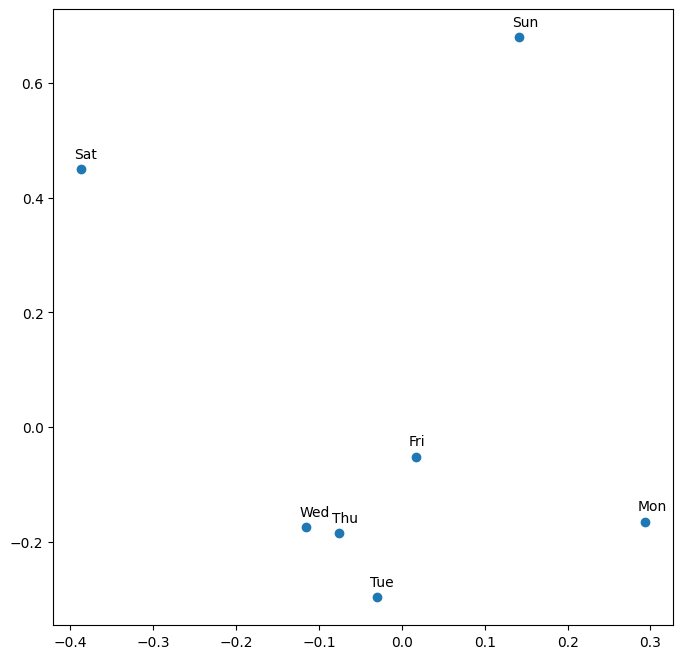

In [119]:
plot_embed('DayOfWeek_embedding', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(1115, 2)


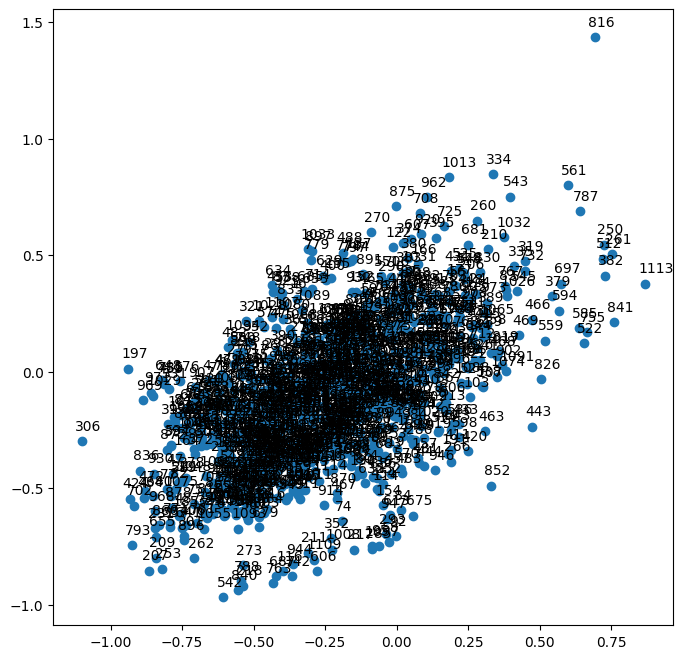

In [120]:
plot_embed('Store_embedding', list(range(1115)))

In [121]:
train_predictions = model.predict(X_train)*max_sales
get_metric(df_train['Sales'].values, train_predictions.reshape(-1))

25443/25443 [==============================] - 43s 2ms/step


0.3049934943112476

In [122]:
test_predictions = model.predict(X_test)*max_sales
test_predictions[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 3s 2ms/step


In [123]:
sample_csv = pd.read_csv('sample_submission.csv')
sample_csv['Sales'] = test_predictions
sample_csv.to_csv('baseline.csv', index=False)

## EDA

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

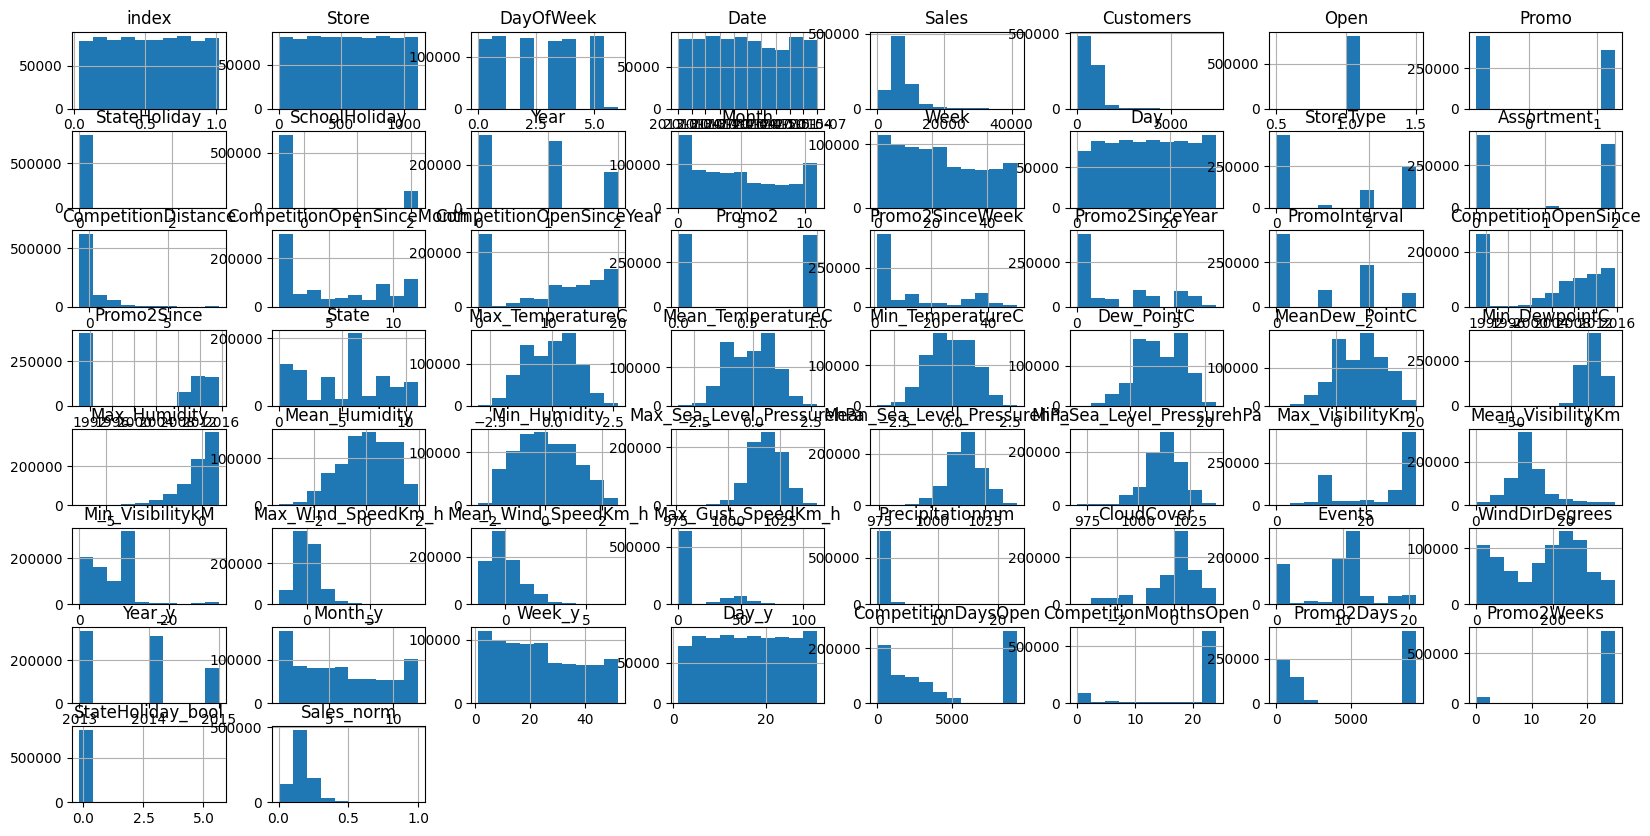

In [125]:
df_train.hist(figsize=(20,10))
plt.show()

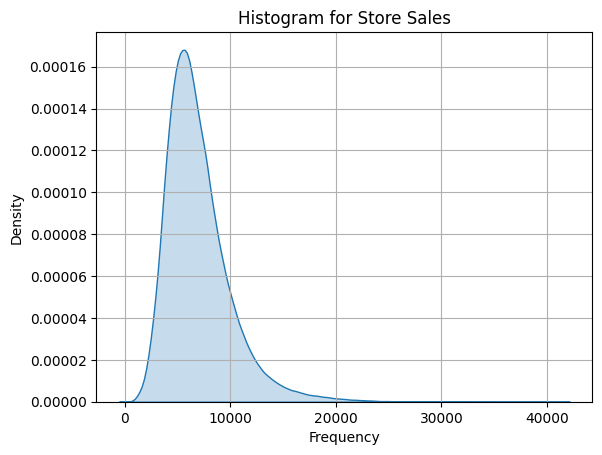

In [126]:
#Create a histogram to study the Daily Sales for the storesplt.figure(figsize=(10,5))
plt.grid()
sns.kdeplot(df_train["Sales"], fill=True)
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

## Train- Test - Split

In [127]:
del df_train["Date"]

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [129]:
target = ["Sales"]

In [130]:
x_train, x_test, y_train, y_test = train_test_split(df_train,df_train[target],test_size=0.2,random_state=2018)

In [131]:
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)

In [132]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (586188, 59)
Shape of x_val: (65132, 59)
Shape of x_test: (162830, 59)
Shape of y_train: (586188, 1)
Shape of y_val: (65132, 1)
Shape of y_test: (162830, 1)


In [133]:
DataFrameSummary(df_train).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
index,814150,numeric,0
Store,1115,numeric,0
DayOfWeek,7,numeric,0
Sales,21641,numeric,0
Customers,4073,numeric,0
Open,1,constant,0
Promo,2,bool,0
StateHoliday,4,numeric,0
SchoolHoliday,2,bool,0
Year,3,numeric,0


In [134]:
df_train["Open"]

30188     1
30189     1
30190     1
30191     1
30192     1
         ..
844333    1
844334    1
844335    1
844336    1
844337    1
Name: Open, Length: 814150, dtype: int64

In [135]:
x_train.head()

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Year_y,Month_y,Week_y,Day_y,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,Sales_norm
268088,323678,407,0,5539,532,1,1.273237,0,-0.466372,1,...,2014,9,40,29,9023,24,1792,25,-0.177442,0.133306
673941,810430,610,4,5635,516,1,1.273237,0,-0.466372,0,...,2013,7,27,5,3855,24,0,0,-0.177442,0.135616
320979,385802,909,4,4669,511,1,-0.785400,0,2.144211,1,...,2014,7,30,25,8957,24,571,25,-0.177442,0.112368
843859,1015631,651,2,5250,624,1,-0.785400,0,2.144211,0,...,2013,1,1,2,8388,24,8402,25,-0.177442,0.126351
700534,841446,406,4,3687,300,1,1.273237,0,-0.466372,0,...,2013,6,23,7,3523,24,795,25,-0.177442,0.088734


### Red neuronal

In [136]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [137]:
model = Sequential()
model.add(Dense(44, input_dim=50, activation='relu'))
model.add(Dense(44, activation='linear'))

model.compile(loss="adam",
        optimizer="sgd",
        metrics = ["mean_absolute_error"])

In [138]:
model.fit(x_train, y_train, batch_size=100, epochs=5)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [139]:

# evaluate the keras model
accuracy = model.evaluate(x_test, y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
accuracy

In [140]:
#no funciono el test

### Deep neural network (DEEP LEARNING)

In [141]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [142]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
#El input_dim = 44, ya que el ancho de los datos de entrenamiento = 44 (consulte la sección de datos engg)
model.add(Dense(1,activation = "linear"))

In [143]:
#Configurar el modelo
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [144]:
#Train the model
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
x_train.head()

# segunda formulacion (sin datos externos)

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [146]:
store = pd. read_csv ('store.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv', low_memory=False)

In [147]:
print("Tamaño del dataset:",train.shape)
print("Tamaño del dataset:",store.shape)

Tamaño del dataset: (1017209, 9)
Tamaño del dataset: (1115, 10)


In [148]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [149]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [150]:
train_data = train.merge(store,on=["Store"], how="inner")
print(train_data.shape)

(1017209, 18)


In [151]:
print("Distintos numerods de tiendas :", len(train_data["Store"].unique()))
print("Distontos numeros de dias :", len(train_data["Date"].unique()))
print("Promedio de ventas diarias de todas las tiendas : ",round(train_data["Sales"].mean(),2))

Distintos numerods de tiendas : 1115
Distontos numeros de dias : 942
Promedio de ventas diarias de todas las tiendas :  5773.82


## verificando los datos de entrada

In [152]:
train_data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [153]:
train_data["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [154]:
### Extraemos los datos de la fecha
train_data['Date'] = pd.to_datetime(train_data['Date'], infer_datetime_format=True)
train_data["Month"] = train_data["Date"].dt.month
train_data["Quarter"] = train_data["Date"].dt.quarter
train_data["Year"] = train_data["Date"].dt.year
train_data["Day"] = train_data["Date"].dt.day
train_data["Week"] = train_data["Date"].dt.week

C:\Users\destr\AppData\Local\Temp\ipykernel_25604\3952543506.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_data["Week"] = train_data["Date"].dt.week


In [155]:
train_data["Month"]

0          7
1          7
2          7
3          7
4          7
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: Month, Length: 1017209, dtype: int64

In [156]:
#Se crea una variabla de Season y se escoge a la estación dependiendo el mes en el que se encuentran los datos. 
train_data["Season"] = np.where(train_data["Month"].isin([3,4,5]),"Spring",np.where(train_data["Month"].isin([6,7,8]),"Summer",np.where(train_data["Month"].isin([9,10,11]),"Fall",np.where(train_data["Month"].isin([12,1,2]),"Winter","None"))))

In [157]:
## visualizamos las variables creadas a partir de fecha "Date" 
print(train_data[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


## Eda

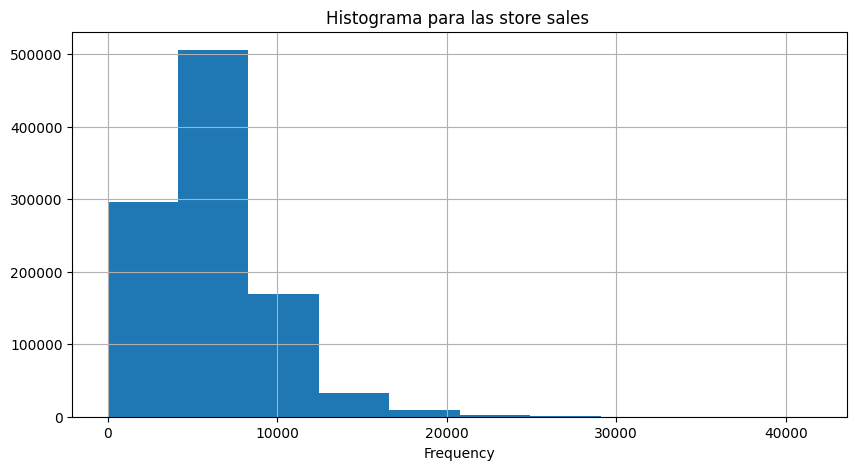

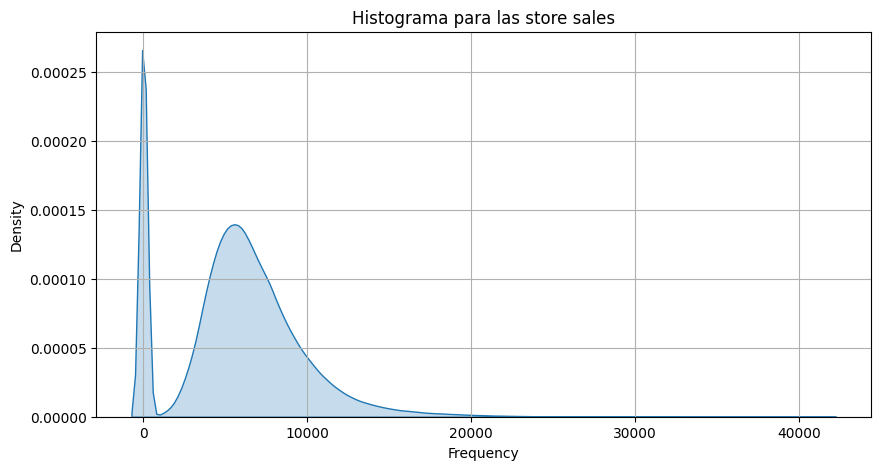

In [158]:
#histograma de las sales 
plt.figure(figsize=(10,5))
plt.grid()
plt.hist(train_data["Sales"])
plt.title("Histograma para las store sales ")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

#histograma para las sales 
plt.figure(figsize=(10,5))
plt.grid()
sns.kdeplot(train_data["Sales"], fill=True)
plt.title("Histograma para las store sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

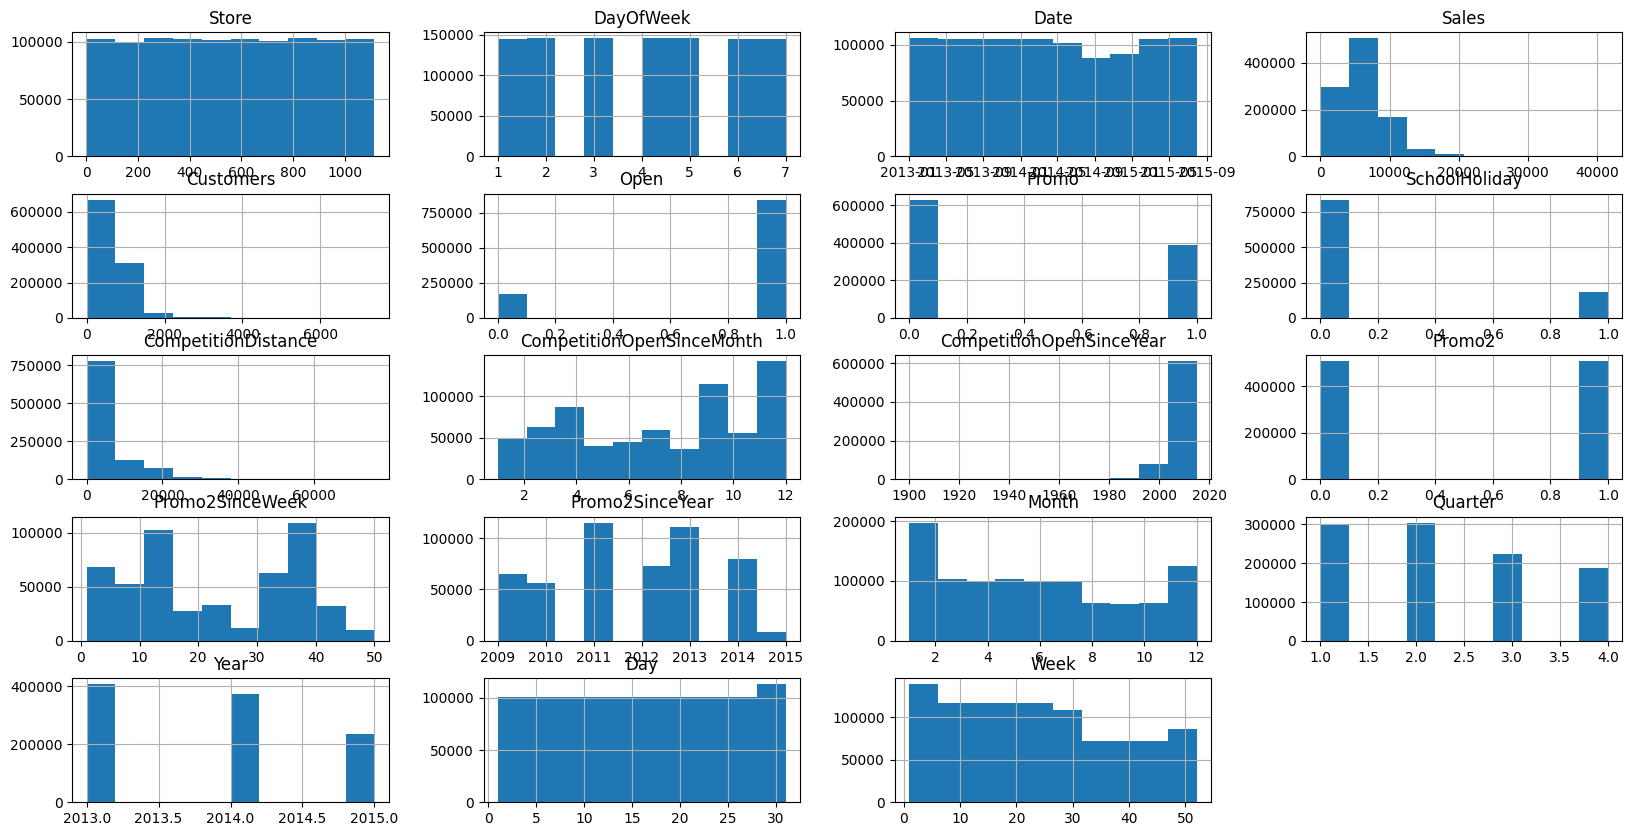

In [159]:
train_data.hist(figsize=(20,10))
plt.show()

In [160]:
DataFrameSummary(train_data).summary()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Quarter,Year,Day,Week,Season
count,1017209.0,1017209.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,NaN,1017209.0,NaN,...,1017209.0,509178.0,509178.0,NaN,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,NaN
mean,558.429727,3.998341,NaN,5773.818972,633.145946,0.830107,0.381515,NaN,0.178647,NaN,...,0.500564,23.269093,2011.752774,NaN,5.846762,2.294252,2013.832292,15.70279,23.615515,NaN
std,321.908651,1.997391,NaN,3849.926175,464.411734,0.375539,0.485759,NaN,0.383056,NaN,...,0.5,14.095973,1.66287,NaN,3.326097,1.08185,0.777396,8.787638,14.433381,NaN
min,1.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.0,1.0,2009.0,NaN,1.0,1.0,2013.0,1.0,1.0,NaN
25%,280.0,2.0,NaN,3727.0,405.0,1.0,0.0,NaN,0.0,NaN,...,0.0,13.0,2011.0,NaN,3.0,1.0,2013.0,8.0,11.0,NaN
50%,558.0,4.0,NaN,5744.0,609.0,1.0,0.0,NaN,0.0,NaN,...,1.0,22.0,2012.0,NaN,6.0,2.0,2014.0,16.0,22.0,NaN
75%,838.0,6.0,NaN,7856.0,837.0,1.0,1.0,NaN,0.0,NaN,...,1.0,37.0,2013.0,NaN,8.0,3.0,2014.0,23.0,35.0,NaN
max,1115.0,7.0,NaN,41551.0,7388.0,1.0,1.0,NaN,1.0,NaN,...,1.0,50.0,2015.0,NaN,12.0,4.0,2015.0,31.0,52.0,NaN
counts,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,1017209,...,1017209,509178,509178,509178,1017209,1017209,1017209,1017209,1017209,1017209
uniques,1115,7,942,21734,4086,2,2,4,2,4,...,2,24,7,3,12,4,3,31,52,4


In [161]:
for i in train_data.columns:
    print("Valores faltantes en ",i, "is -",  "    "  ,train_data[i].isnull().sum())

Valores faltantes en  Store is -      0
Valores faltantes en  DayOfWeek is -      0
Valores faltantes en  Date is -      0
Valores faltantes en  Sales is -      0
Valores faltantes en  Customers is -      0
Valores faltantes en  Open is -      0
Valores faltantes en  Promo is -      0
Valores faltantes en  StateHoliday is -      0
Valores faltantes en  SchoolHoliday is -      0
Valores faltantes en  StoreType is -      0
Valores faltantes en  Assortment is -      0
Valores faltantes en  CompetitionDistance is -      2642
Valores faltantes en  CompetitionOpenSinceMonth is -      323348
Valores faltantes en  CompetitionOpenSinceYear is -      323348
Valores faltantes en  Promo2 is -      0
Valores faltantes en  Promo2SinceWeek is -      508031
Valores faltantes en  Promo2SinceYear is -      508031
Valores faltantes en  PromoInterval is -      508031
Valores faltantes en  Month is -      0
Valores faltantes en  Quarter is -      0
Valores faltantes en  Year is -      0
Valores faltantes e

* Valores faltantes en  CompetitionDistance is -      2642
* Valores faltantes en  CompetitionOpenSinceMonth is -      323348
* Valores faltantes en  CompetitionOpenSinceYear is -      323348
* Valores faltantes en  Promo2SinceWeek is -      508031
* Valores faltantes en  Promo2SinceYear is -      508031
* Valores faltantes en  PromoInterval is -      508031

In [162]:
# Utilizamos las mismas consideraciones que el anterior
train_data.loc[train_data['CompetitionOpenSinceYear'].isna() | (train_data['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceYear'] = np.int32(1990)
train_data.loc[train_data['CompetitionOpenSinceMonth'].isna() | (train_data['CompetitionOpenSinceYear']<1990), 'CompetitionOpenSinceMonth'] = np.int32(1)
train_data.loc[train_data['CompetitionDistance'].isna(), 'CompetitionDistance'] = train_data['CompetitionDistance'].max()
train_data.loc[train_data['Promo2SinceWeek'].isna() & (train_data['Promo2'] == 0), 'Promo2SinceWeek'] = np.int32(1)
train_data.loc[train_data['Promo2SinceYear'].isna() & (train_data['Promo2'] == 0), 'Promo2SinceYear'] = np.int32(1990)
train_data.loc[train_data['PromoInterval'].isna() & (train_data['Promo2'] == 0), 'PromoInterval'] = '-'

In [163]:
for i in train_data.columns:
    print("Valores faltantes en ",i, "is -",  "    "  ,train_data[i].isnull().sum())

Valores faltantes en  Store is -      0
Valores faltantes en  DayOfWeek is -      0
Valores faltantes en  Date is -      0
Valores faltantes en  Sales is -      0
Valores faltantes en  Customers is -      0
Valores faltantes en  Open is -      0
Valores faltantes en  Promo is -      0
Valores faltantes en  StateHoliday is -      0
Valores faltantes en  SchoolHoliday is -      0
Valores faltantes en  StoreType is -      0
Valores faltantes en  Assortment is -      0
Valores faltantes en  CompetitionDistance is -      0
Valores faltantes en  CompetitionOpenSinceMonth is -      0
Valores faltantes en  CompetitionOpenSinceYear is -      0
Valores faltantes en  Promo2 is -      0
Valores faltantes en  Promo2SinceWeek is -      0
Valores faltantes en  Promo2SinceYear is -      0
Valores faltantes en  PromoInterval is -      0
Valores faltantes en  Month is -      0
Valores faltantes en  Quarter is -      0
Valores faltantes en  Year is -      0
Valores faltantes en  Day is -      0
Valores f

In [164]:
# no hay datos faltantes

## cambiar las variables categoricas

In [165]:
DataFrameSummary(train_data).summary().loc[['uniques', 'types', 'missing']].T

,uniques,types,missing
Store,1115,numeric,0
DayOfWeek,7,numeric,0
Date,942,date,0
Sales,21734,numeric,0
Customers,4086,numeric,0
Open,2,bool,0
Promo,2,bool,0
StateHoliday,4,categorical,0
SchoolHoliday,2,bool,0
StoreType,4,categorical,0


In [166]:
# Variables categoricas:  season, promo interval, assortment, storetype,  state holiday 

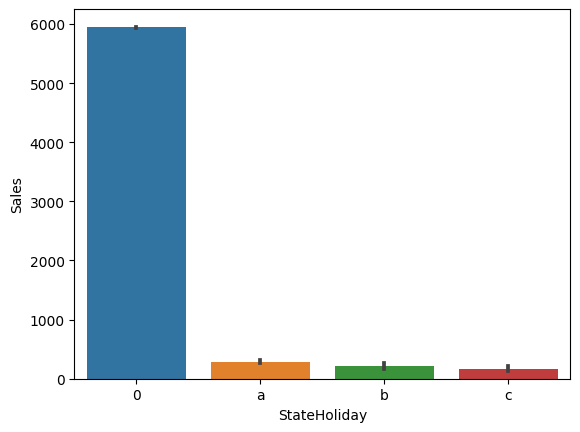

In [167]:
dx = sns.barplot(x="StateHoliday", y="Sales", data=train_data) 

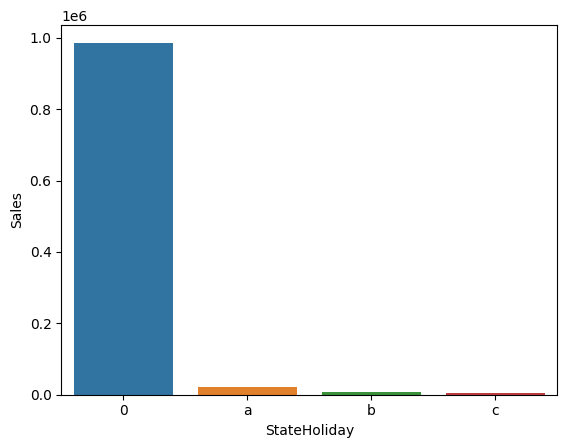

In [168]:
# state holiday c = + ventas
# ventas promedio  para state holiday
ax = sns.barplot(x="StateHoliday", y="Sales", data=train_data,estimator=np.size)

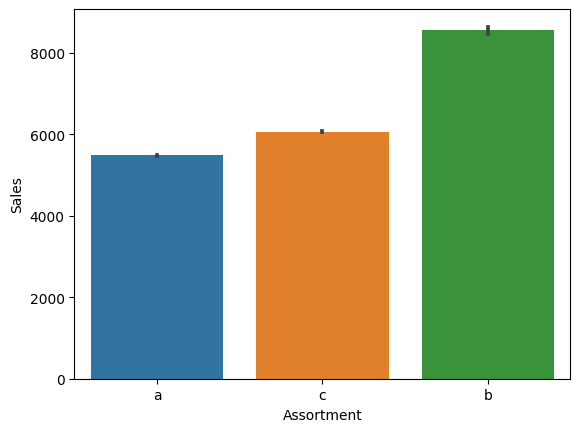

In [169]:
ax = sns.barplot(x="Assortment", y="Sales", data=train_data)

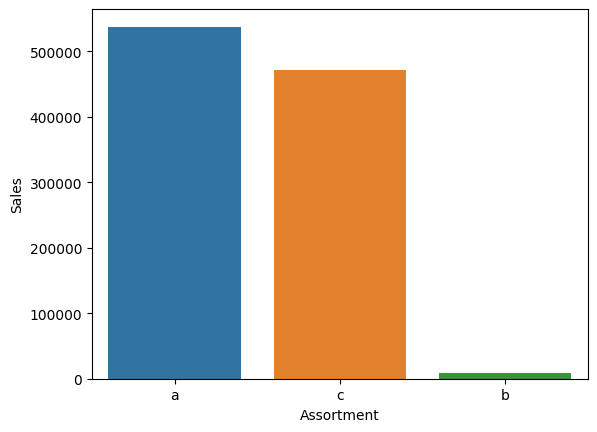

In [170]:
#asortment B mas sales 
# ventas promedio  para assortment
ax = sns.barplot(x="Assortment", y="Sales", data=train_data,estimator=np.size)

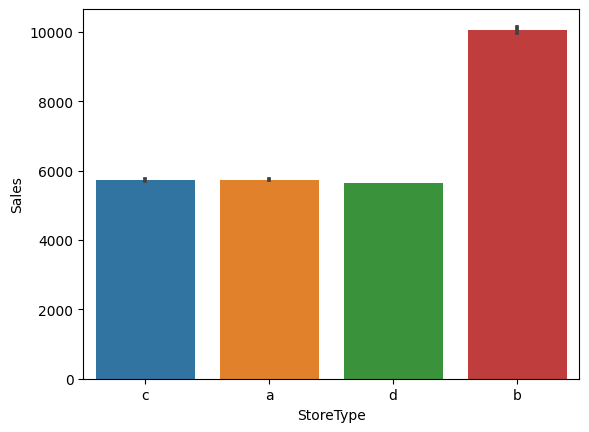

In [171]:
bx = sns.barplot(x="StoreType", y="Sales", data=train_data)


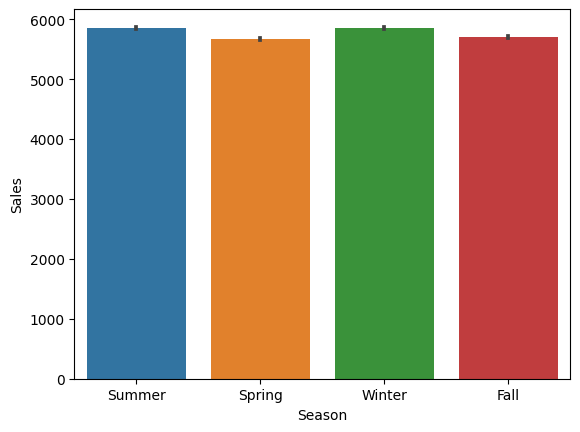

In [172]:
cx = sns.barplot(x="Season", y="Sales", data=train_data)

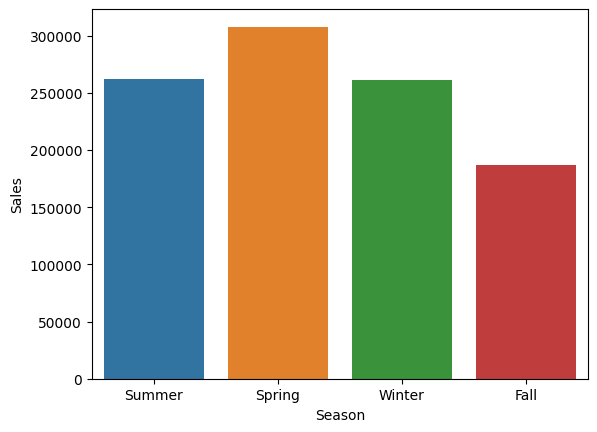

In [173]:
ax = sns.barplot(x="Season", y="Sales", data=train_data,estimator=np.size)

In [174]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [175]:
target = ["Sales"]

In [176]:
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday",
                   "CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
                       "StoreType","Assortment","Season"]

In [177]:
#Definir una función que tomará el marco de datos sin procesar
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(train_data[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [178]:
#Dado que la función anterior convierte la columna, una a la vez
#Creamos un bucle para crear el conjunto de datos final con todas las características
temp = train_data[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(train_data,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [179]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [180]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

### Particionamos el dataset

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
x_train, x_test, y_train, y_test = train_test_split(temp,train_data[target],test_size=0.2,random_state=2018)

In [183]:
#Divida aún más el conjunto de datos de entrenamiento en conjuntos de datos de entrenamiento y validación con una división de 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)

## MODELOS

In [184]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import datetime
from pandas_summary import DataFrameSummary
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model

### deep learning

In [185]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
#El input_dim = 44, ya que el ancho de los datos de entrenamiento = 44 (consulte la sección de datos engg)
model.add(Dense(1,activation = "linear"))

In [186]:
#Configurar el modelo
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [187]:
#Enrtenar el modelo
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 28s 2ms/step - loss: 954.1958 - mean_absolute_error: 954.1958 - val_loss: 834.2292 - val_mean_absolute_error: 834.2292
Epoch 2/10
11444/11444 [==============================] - 27s 2ms/step - loss: 782.1229 - mean_absolute_error: 782.1229 - val_loss: 753.0172 - val_mean_absolute_error: 753.0172
Epoch 3/10
11444/11444 [==============================] - 27s 2ms/step - loss: 738.4470 - mean_absolute_error: 738.4470 - val_loss: 734.4035 - val_mean_absolute_error: 734.4035
Epoch 4/10
11444/11444 [==============================] - 27s 2ms/step - loss: 722.4380 - mean_absolute_error: 722.4380 - val_loss: 721.4589 - val_mean_absolute_error: 721.4589
Epoch 5/10
11444/11444 [==============================] - 27s 2ms/step - loss: 711.9529 - mean_absolute_error: 711.9529 - val_loss: 708.6016 - val_mean_absolute_error: 708.6016
Epoch 6/10
11444/11444 [==============================] - 27s 2ms/step - loss: 704.7394 - mean_absolute_error: 704.

In [188]:
#Utilice el método de evaluación del modelo para predecir y evaluar los conjuntos de datos de prueba
result = model.evaluate(x_test.values,y_test.values)


#Imprime los resultados
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 13s 2ms/step - loss: 678.2778 - mean_absolute_error: 678.2778
Metric  loss : 678.28
Metric  mean_absolute_error : 678.28


In [189]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=50,batch_size=20)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/50
36620/36620 [==============================] - 141s 4ms/step - loss: 1576363.1250 - mean_absolute_error: 826.5714 - val_loss: 1636394.1250 - val_mean_absolute_error: 915.1998
Epoch 2/50
36620/36620 [==============================] - 138s 4ms/step - loss: 1185777.0000 - mean_absolute_error: 728.2278 - val_loss: 1231982.5000 - val_mean_absolute_error: 742.4370
Epoch 3/50
36620/36620 [==============================] - 139s 4ms/step - loss: 1113946.1250 - mean_absolute_error: 705.1649 - val_loss: 1147505.0000 - val_mean_absolute_error: 729.2095
Epoch 4/50
36620/36620 [==============================] - 137s 4ms/step - loss: 1069037.7500 - mean_absolute_error: 691.0604 - val_loss: 1167868.8750 - val_mean_absolute_error: 716.6312
Epoch 5/50
36620/36620 [==============================] - 138s 4ms/step - loss: 1044604.5000 - mean_absolute_error: 683.3002 - val_loss: 983882.1875 - val_mean_absolute_error: 661.9647
Epoch 6/50
36620/36620 [==============================] - 138s 4ms/step

In [232]:
y_test["Prediction"] = model.predict(x_test)


6358/6358 [==============================] - 11s 2ms/step


In [233]:
y_test.columns = ["Actual Sales","Predicted Sales"]

In [234]:
print(y_test.head(10))

        Actual Sales  Predicted Sales
115563             0        -0.013393
832654             0        -0.013393
769112          2933      3179.705811
350588          8602      8336.891602
141556          6975      6623.229492
84435           9239      8870.459961
53018              0        -0.013393
262419             0        -0.013393
702267          5885      5755.642578
981431             0        -0.013393


In [230]:
sample_csv = pd.read_csv('sample_submission.csv')
sample_csv.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [235]:
sample_csv['Sales'] = y_test["Predicted Sales"]

In [236]:
sample_csv.Sales.fillna(0, inplace=True)

In [237]:
sample_csv.to_csv('Deep_learning.csv', index=False)

# Conclusion

Resultados de la competencia

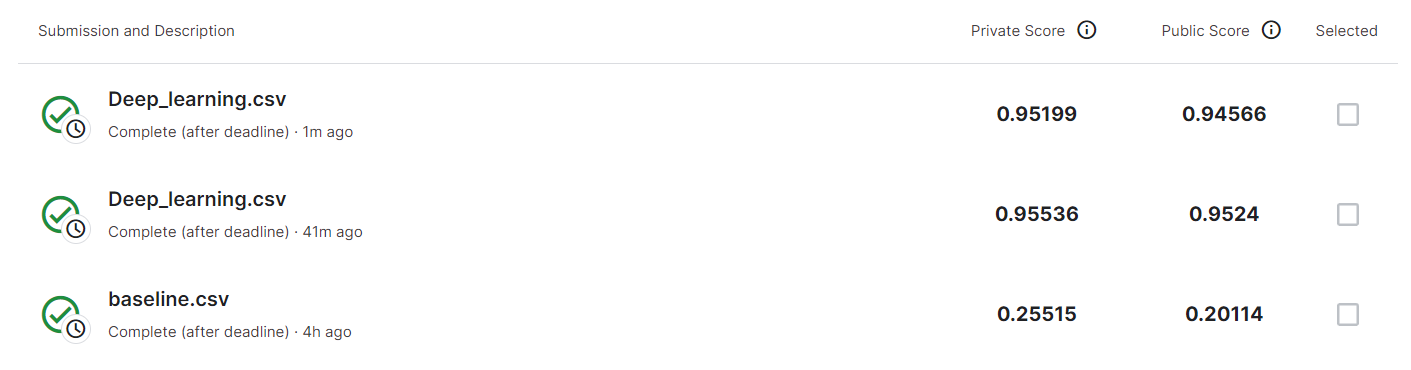

In [238]:
from PIL import Image
im = Image.open("resultados.png")
im

Deep_learning con private score de .95199 fue modificando las neuronas en la capa oculta con respecto a Deep_learning con private score de .95536, pero la diferencia no fue tan significativa puesto que mean_absolute_error no eran tan distintos uno de otro. 

El mejor resultado obtenido gue el baseline.csv con un private score de 0.25515 el cual fue hecho con un modelo creado por entiti embedings el cual fue un modelo propuesto en el trabajo de clase, con mis datos de entrada. ese resultado fue logrado utilizando external data y rellenando los datos con mean.

Para mejorar el resultado es necesario mejorar la base de datos a modo de que el procesamiento de datos a traves de la red neuronal sea mejor. 

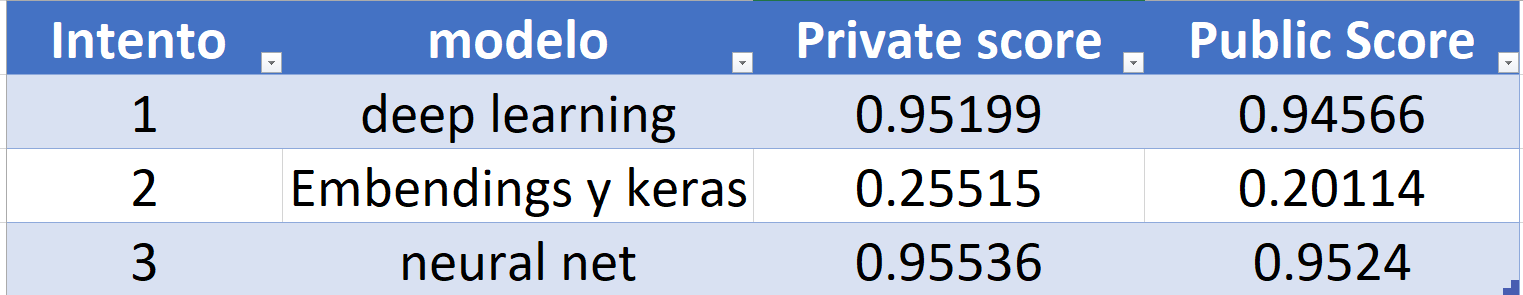

In [239]:
im = Image.open("tabla.png")
im